In [6]:
# Importar las librerías necesarias
import pandas as pd

# Cargar los datos de un archivo CSV

df_superstore = pd.read_csv('C:/Users/ljgov/Documents/LABORATORIA/PROYECTO_ETL/superstore.csv')


In [10]:
import pandas as pd

# Habilitar la opción para evitar advertencias en el futuro
pd.set_option('future.no_silent_downcasting', True)

# Ejemplo de datos iniciales
data = {
    'category': ['Furniture', 'Office Supplies', 'Technology', 'furniture'],
    'city': ['Los Angeles', 'Los Angeles', 'los angeles', 'Los Angeles'],
    'country': ['United States', 'US', 'U.S.', 'United States'],
    'customer_ID': ['LS-172304', 'MV-174584', 'CS-123104', 'AP-109154'],
    'order_priority': ['High', 'Medium', 'Low', 'medium'],
    'market': ['US', 'US', 'US', 'US'],
    'order_date': ['7/01/2011 0:00:00', '8/01/2011 0:00:00', '9/01/2011 0:00:00', '10/01/2011 0:00:00'],
    'region': ['West', 'West', 'west', 'West'],
    'ship_date': ['9/01/2011 0:00:00', '10/01/2011 0:00:00', '11/01/2011 0:00:00', '12/01/2011 0:00:00'],
    'product_name': ['Desk', 'Pen', 'Laptop', 'Chair'],
    'profit': [50, 5, 150, 45],
    'quantity': [2, 10, 1, 3],
    'sales': [200, 20, 1000, 150],
    'ship_mode': ['Standard', 'Second Class', 'First Class', 'Standard'],
    'state': ['California', 'California', 'California', 'California'],
    'sub_category': ['Office Supplies', 'Office Supplies', 'Technology', 'Furniture'],
    'year': [2011, 2011, 2011, 2011],
    'market2': ['West', 'West', 'West', 'West'],
    'weeknum': [1, 2, 3, 4],
    'order_id': ['OD001', 'OD002', 'OD003', 'OD004'],
    'row_id': [1, 2, 3, 4],
    'customer_name': ['John Doe', 'Jane Smith', 'Alan Smithee', 'Emma Stone'],
    'discount': [0.1, 0.15, 0.2, 0.05],
    'shipping_cost': [15, 7, 20, 10],
    'unknown': ['NA', 'NA', 'NA', 'NA']
}

df = pd.DataFrame(data)

# Cambiar el valor de la columna 'unknown' de 'NA' a 1 y convertir a entero
df['unknown'] = df['unknown'].replace('NA', 1).astype(int)

# 1. Guardar las columnas originales
df['order_priority_original'] = df['order_priority']

# 2. Estandarización de textos: Solo la primera letra mayúscula
df['category'] = df['category'].str.capitalize()
df['city'] = df['city'].str.capitalize()
df['country'] = df['country'].str.capitalize()
df['order_priority'] = df['order_priority'].str.capitalize()
df['region'] = df['region'].str.capitalize()

# 3. Corrección de errores tipográficos y normalización
df['country'] = df['country'].replace(['Us', 'U.s.'], 'United states')
df['order_priority'] = df['order_priority'].replace({
    'Critical': 4,
    'High': 3,
    'Medium': 2,
    'Low': 1
}).astype(int)

# 4. Codificación de variables categóricas
category_mapping = {
    'Furniture': 1,
    'Office supplies': 2,
    'Technology': 3
}

df['category_code'] = df['category'].map(category_mapping)
df['category_code'] = df['category_code'].fillna(-1)

# 5. Conversión de las columnas de fecha al formato de fecha estándar
df['order_date'] = pd.to_datetime(df['order_date'], format='%d/%m/%Y %H:%M:%S').dt.date
df['ship_date'] = pd.to_datetime(df['ship_date'], format='%d/%m/%Y %H:%M:%S').dt.date

# 6. Extraer componentes de la fecha
df['order_year'] = pd.DatetimeIndex(df['order_date']).year
df['order_month'] = pd.DatetimeIndex(df['order_date']).month
df['order_day'] = pd.DatetimeIndex(df['order_date']).day

df['ship_year'] = pd.DatetimeIndex(df['ship_date']).year
df['ship_month'] = pd.DatetimeIndex(df['ship_date']).month
df['ship_day'] = pd.DatetimeIndex(df['ship_date']).day

# 7. Reordenar las columnas
df = df[['category', 'category_code', 'city', 'country', 'customer_ID', 'customer_name', 'discount',
         'market', 'unknown', 'order_date', 'order_year', 'order_month', 'order_day', 'order_id',
         'order_priority_original', 'order_priority', 'product_name', 'profit',
         'quantity', 'region', 'row_id', 'sales', 'ship_date', 'ship_year', 
         'ship_month', 'ship_day', 'ship_mode', 'shipping_cost', 'state', 'sub_category',
         'year', 'market2', 'weeknum']]

# 8. Verificación de resultados
print(df)


          category  category_code         city        country customer_ID  \
0        Furniture              1  Los angeles  United states   LS-172304   
1  Office supplies              2  Los angeles  United states   MV-174584   
2       Technology              3  Los angeles  United states   CS-123104   
3        Furniture              1  Los angeles  United states   AP-109154   

  customer_name  discount market  unknown  order_date  ...  ship_year  \
0      John Doe      0.10     US        1  2011-01-07  ...       2011   
1    Jane Smith      0.15     US        1  2011-01-08  ...       2011   
2  Alan Smithee      0.20     US        1  2011-01-09  ...       2011   
3    Emma Stone      0.05     US        1  2011-01-10  ...       2011   

   ship_month  ship_day     ship_mode shipping_cost       state  \
0           1         9      Standard            15  California   
1           1        10  Second Class             7  California   
2           1        11   First Class          

In [19]:
# Seleccionar columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns

# Variable para verificar si se encontraron valores no numéricos
valores_no_numericos_encontrados = False

# Encontrar valores no numéricos en columnas numéricas
for col in num_cols:
    # Convertir la columna a tipo numérico forzando errores a NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Verificar si hay valores NaN (que eran textos u otros valores inválidos)
    if df[col].isnull().any():
        valores_no_numericos_encontrados = True
        print(f'Columna {col} tiene valores no numéricos.')
        print(df[df[col].isnull()][col])

# Mostrar mensaje si no se encontraron valores no numéricos
if not valores_no_numericos_encontrados:
    print('No se encontraron valores no numéricos en las columnas numéricas.')


No se encontraron valores no numéricos en las columnas numéricas.


In [11]:
# Resumen estadístico de las variables numéricas
numeric_summary = df.describe()
display(numeric_summary)

,category_code,discount,unknown,order_year,order_month,order_day,order_priority,profit,quantity,row_id,sales,ship_year,ship_month,ship_day,shipping_cost,year,weeknum
count,4.000000,4.00000,4.0,4.0,4.0,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.0,4.0,4.000000,4.000000,4.0,4.000000
mean,1.750000,0.12500,1.0,2011.0,1.0,8.500000,2.000000,62.500000,4.000000,2.500000,342.500000,2011.0,1.0,10.500000,13.000000,2011.0,2.500000
std,0.957427,0.06455,0.0,0.0,0.0,1.290994,0.816497,61.711695,4.082483,1.290994,444.850162,0.0,0.0,1.290994,5.715476,0.0,1.290994
min,1.000000,0.05000,1.0,2011.0,1.0,7.000000,1.000000,5.000000,1.000000,1.000000,20.000000,2011.0,1.0,9.000000,7.000000,2011.0,1.000000
25%,1.000000,0.08750,1.0,2011.0,1.0,7.750000,1.750000,35.000000,1.750000,1.750000,117.500000,2011.0,1.0,9.750000,9.250000,2011.0,1.750000
50%,1.500000,0.12500,1.0,2011.0,1.0,8.500000,2.000000,47.500000,2.500000,2.500000,175.000000,2011.0,1.0,10.500000,12.500000,2011.0,2.500000
75%,2.250000,0.16250,1.0,2011.0,1.0,9.250000,2.250000,75.000000,4.750000,3.250000,400.000000,2011.0,1.0,11.250000,16.250000,2011.0,3.250000
max,3.000000,0.20000,1.0,2011.0,1.0,10.000000,3.000000,150.000000,10.000000,4.000000,1000.000000,2011.0,1.0,12.000000,20.000000,2011.0,4.000000


In [13]:
import pandas as pd

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Cálculo del rango intercuartil (IQR) para cada columna numérica
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

# Mostrar Q1, Q3 e IQR
summary_stats = pd.DataFrame({
    'Q1': Q1,
    'Q3': Q3,
    'IQR': IQR
})

display(summary_stats)

,Q1,Q3,IQR
category_code,1.0000,2.2500,1.250
discount,0.0875,0.1625,0.075
unknown,1.0000,1.0000,0.000
order_year,2011.0000,2011.0000,0.000
order_month,1.0000,1.0000,0.000
order_day,7.7500,9.2500,1.500
order_priority,1.7500,2.2500,0.500
profit,35.0000,75.0000,40.000
quantity,1.7500,4.7500,3.000
row_id,1.7500,3.2500,1.500


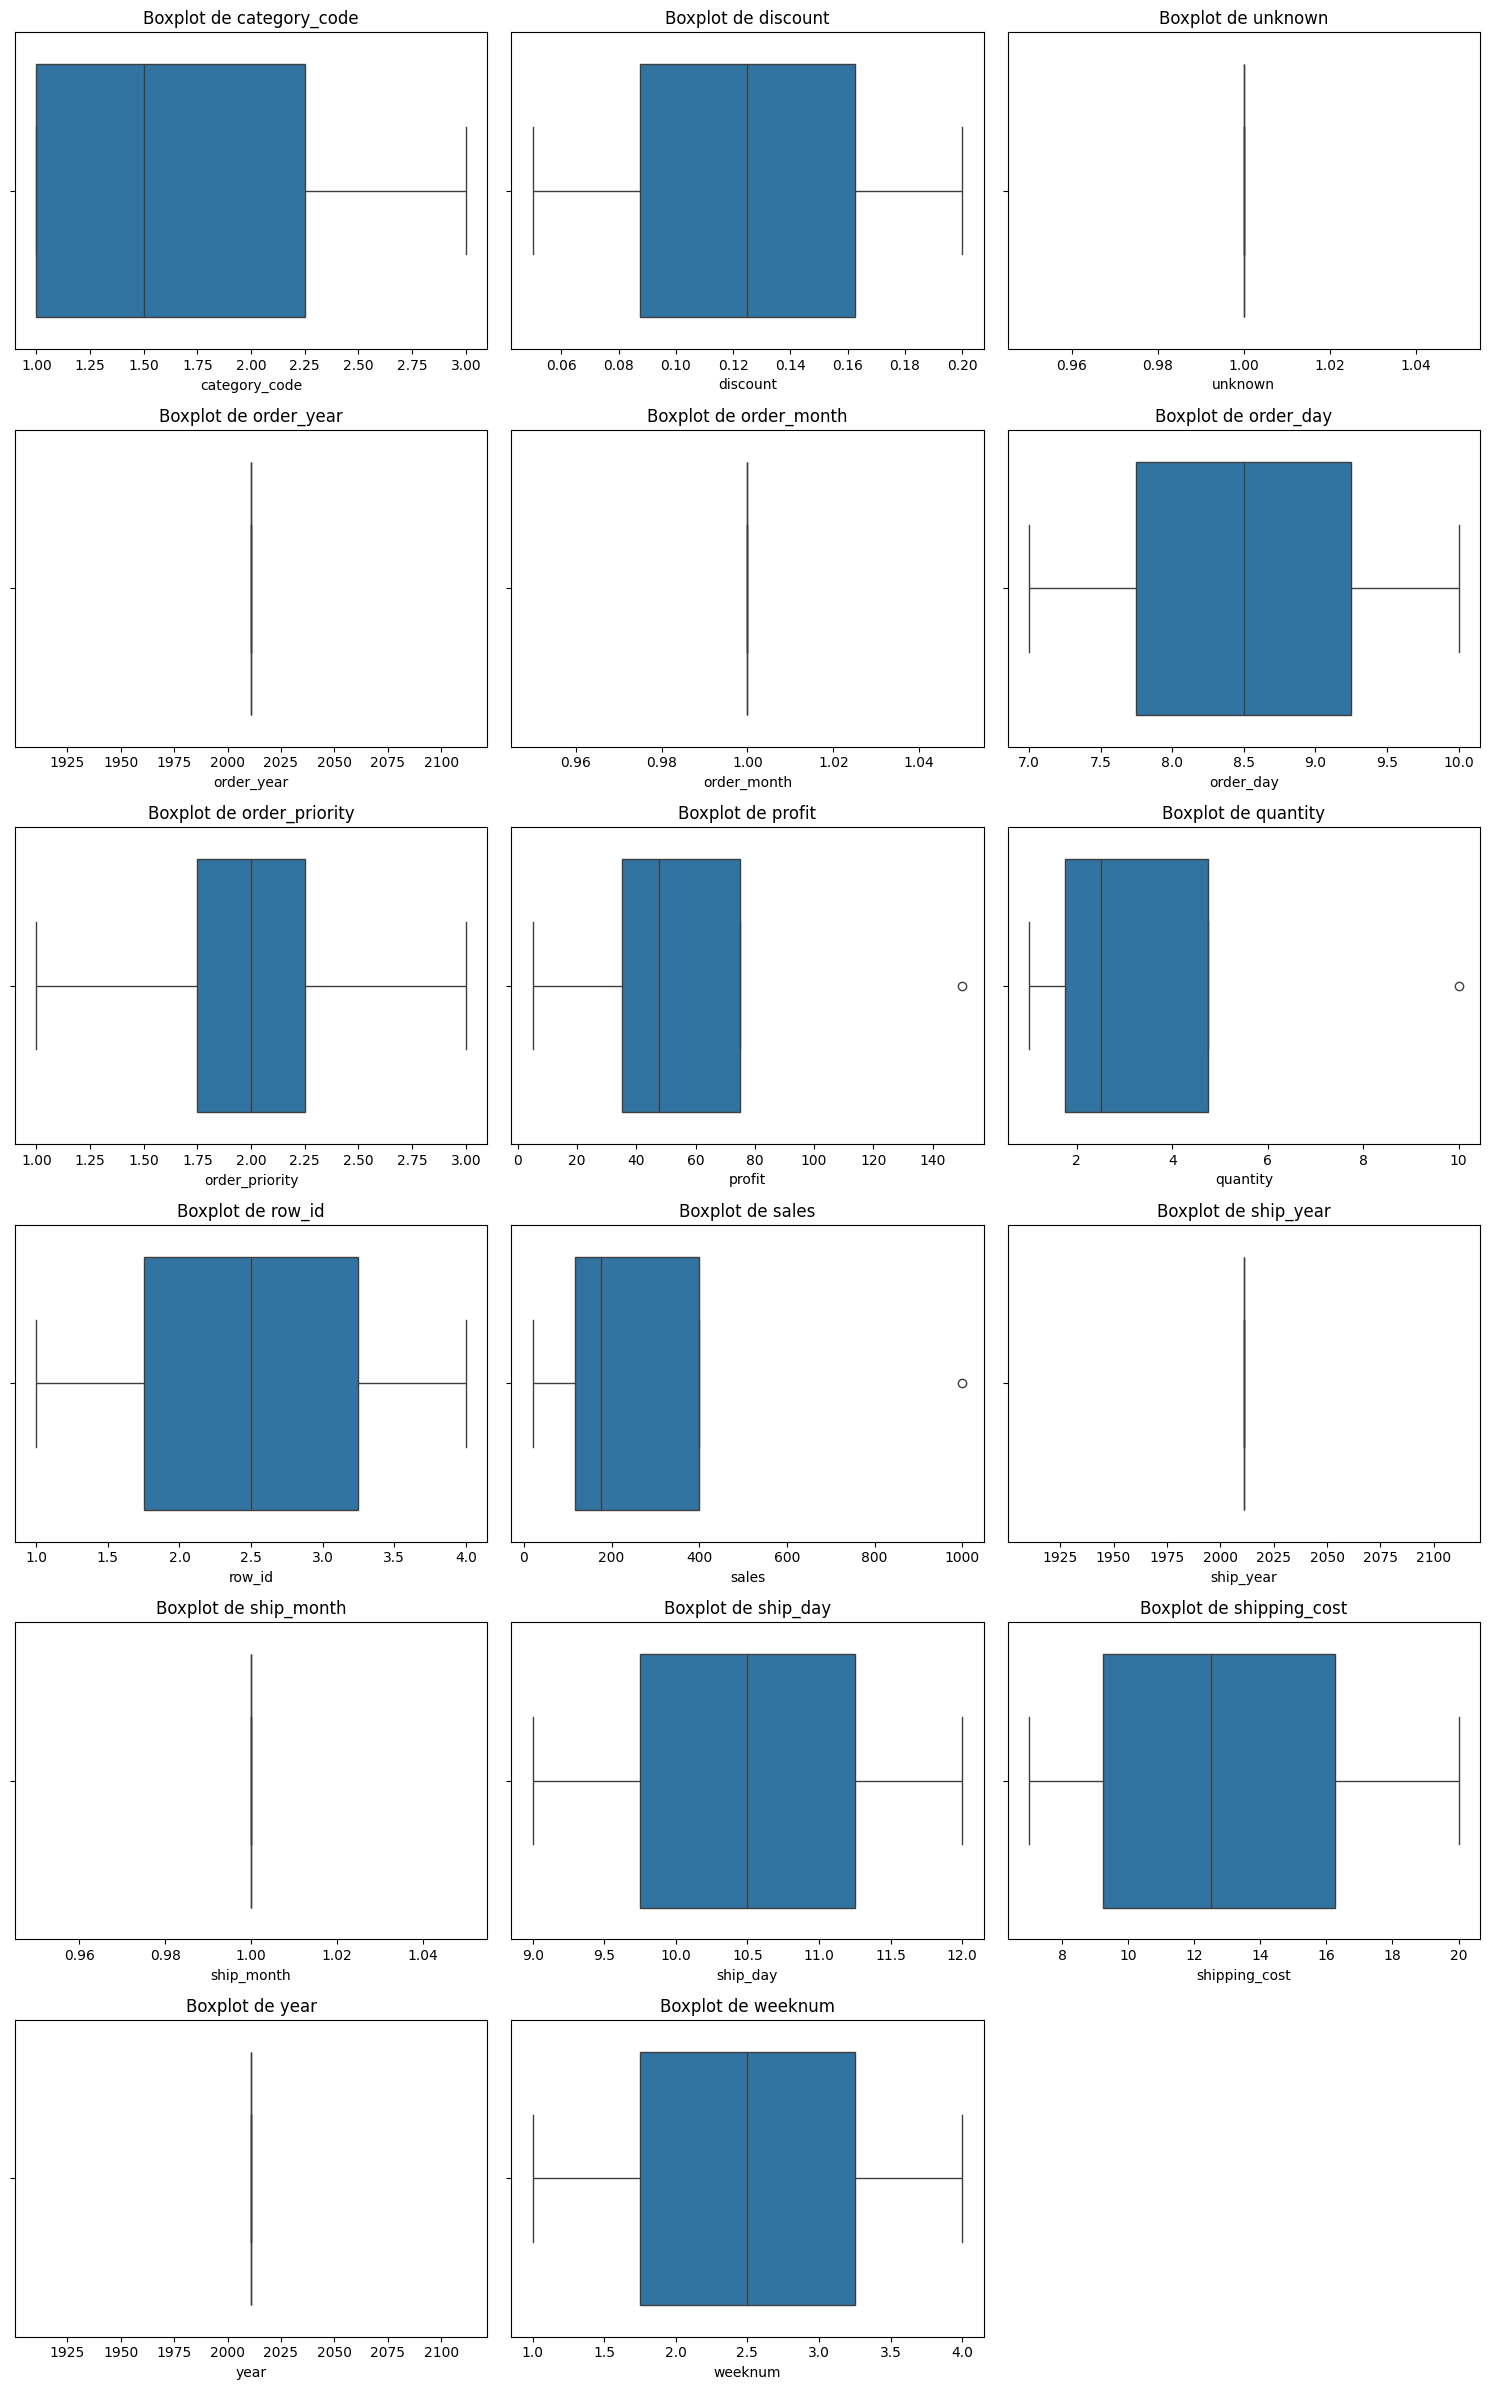

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que df es tu DataFrame

# Seleccionar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['number'])

# Número de columnas en el layout
ncols = 3  # Ajusta el número de columnas según tu preferencia
nrows = len(numeric_df.columns) // ncols + int(len(numeric_df.columns) % ncols > 0)

# Crear una figura y ejes para los gráficos
plt.figure(figsize=(15, nrows * 4))

# Graficar boxplot para cada columna numérica
for i, column in enumerate(numeric_df.columns, 1):
    plt.subplot(nrows, ncols, i)
    sns.boxplot(x=numeric_df[column])
    plt.title(f'Boxplot de {column}')

plt.tight_layout()
plt.show()



In [16]:
# Revisión de valores nulos en las variables numéricas
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [20]:
import pandas as pd
from IPython.display import display
def get_data_types(df):
    data_types = {col: df[col].dtypes.name for col in df.columns}
    return data_types
def display_data_types_summary(df):
    data_types = get_data_types(df)
    # Define the categories of types
    types = {
        'int': ['int8', 'int16', 'int32', 'int64', 'uint8', 'uint16', 'uint32', 'uint64', 'Int64'],
        'float': ['float16', 'float32', 'float64'],
        'datetime': ['datetime64[ns]', 'datetime64[s]', 'datetime64[ms]', 'datetime64[us]', 'datetime64[ns, UTC]', 'datetime64[us, UTC]'],
        'object': ['object']
    }
    # Initialize a dictionary to hold the columns by data type
    categorized_data_types = {cat: [] for cat in types}
    # Categorize each column by its data type
    for col, dtype in data_types.items():
        category = 'object'
        for cat, dtypes_list in types.items():
            if dtype in dtypes_list:
                category = cat
                break
        categorized_data_types[category].append(col)
    # Convert the dictionary to a DataFrame for display
    df_summary = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in categorized_data_types.items()]))
    # Replace NaN values with --
    df_summary = df_summary.fillna('--')
    # Display the DataFrame
    display(df_summary)
# Ejemplo de uso
display_data_types_summary(df)

,int,float,datetime,object
0,category_code,discount,--,category
1,unknown,--,--,city
2,order_year,--,--,country
3,order_month,--,--,customer_ID
4,order_day,--,--,customer_name
5,order_priority,--,--,market
6,profit,--,--,order_date
7,quantity,--,--,order_id
8,row_id,--,--,order_priority_original
9,sales,--,--,product_name


In [22]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from io import StringIO

# Realiza la solicitud a la página web
url = "https://en.wikipedia.org/wiki/List_of_supermarket_chains"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Encuentra la primera tabla con la clase 'wikitable'
table = soup.find_all('table', {'class': 'wikitable'})[0]

# Convierte la tabla a un string y usa StringIO para crear un objeto similar a un archivo
table_str = str(table)
table_io = StringIO(table_str)

# Usa pandas para leer la tabla HTML desde el objeto StringIO
df_list = pd.read_html(table_io)[0]

# Elimina la columna 'Unnamed: 6'
df_list = df_list.drop(columns=['Unnamed: 6'], errors='ignore')
df_list = df_list.drop(columns=['Map'], errors='ignore')

# Muestra las primeras filas del DataFrame para inspección
display(df_list.head())


,Company,Headquarters,Served countries (besides the headquarters),Number of locations,Number of employees
0,7-Eleven,Japan United States,"Australia, Canada, China, Cambodia, Denmark, H...",84500,170000
1,Aeon,Japan,"Australia, Cambodia, China, Hong Kong, India, ...",20008,"560,000+"
2,Ahold Delhaize,Netherlands,"Belgium (as Albert Heijn and Delhaize), Czech ...",7659,375000
3,Aldi Nord,Germany,"Belgium, Denmark, France, Luxembourg, Netherla...",5241,72811
4,Aldi Süd,Germany,"Australia, Austria (as Hofer), China, Hungary,...",7178,201361
